In [1]:
import pandas as pd
airbnb_df = pd.read_csv("airbnb_kenya.csv")

DATA CLEANING

In [2]:
airbnb_df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,5385690,1461,3528139,Shared room,NaN,Kenya,NaN,Mombasa,1,4.0,12.0,1,NaN,70,NaN,Geo Mara Mombasa Beach Getaway,58:32.5,-3.967296,39.749705,0101000020E6100000E7525C55F6DF4340B6696CAF05BD...
1,18011354,1461,2689184,Shared room,NaN,Kenya,NaN,Nairobi,1,4.0,6.0,1,NaN,80,NaN,Westlands Backpackers,58:32.5,-1.248991,36.796196,0101000020E61000005F9A22C0E96542402FF99FFCDDFB...
2,872309,1461,4583407,Shared room,NaN,Kenya,NaN,Nairobi,8,1.0,2.0,1,NaN,75,NaN,Escapade Nest,58:32.5,-1.292178,36.814079,0101000020E610000021AE9CBD3368424061C5A9D6C2AC...
3,16082140,1461,104806976,Shared room,NaN,Kenya,NaN,Nairobi,0,5.0,1.0,1,NaN,67,NaN,lcons Pride,58:32.5,-1.212083,36.839839,0101000020E6100000E27327D87F6B4240E199D024B164...
4,11453077,1461,60220077,Shared room,NaN,Kenya,NaN,Mombasa,1,4.0,2.0,1,NaN,45,NaN,Barizi Apartment,58:30.8,-4.033121,39.716149,0101000020E610000014083BC5AADB4340473EAF78EA21...


In [3]:
# Display information about missing values
print(airbnb_df.isnull().sum())

room_id                    0
survey_id                  0
host_id                    0
room_type                  0
country                 4749
city                       0
borough                 4749
neighborhood               0
reviews                    0
overall_satisfaction       0
accommodates               0
bedrooms                   0
bathrooms               4749
price                      0
minstay                 4749
name                      11
last_modified              0
latitude                   0
longitude                  0
location                   0
dtype: int64


In [4]:
# Drop the 'borough' column
airbnb_df.drop('borough', axis=1, inplace=True)

In [5]:
# Drop the 'bathrooms' column
airbnb_df.drop('bathrooms', axis=1, inplace=True)

In [6]:
#Drop the 'minstay' column
airbnb_df.drop('minstay', axis=1, inplace=True)

In [7]:
#Drop the 'room_id' column
airbnb_df.drop('room_id', axis=1, inplace=True)
#Drop the 'survey_id' column
airbnb_df.drop('survey_id', axis=1, inplace=True)
#Drop the 'host_id' column
airbnb_df.drop('host_id', axis=1, inplace=True)

In [8]:
#Drop the 'accomodates' column
airbnb_df.drop('accommodates', axis=1, inplace=True)
#Drop the 'latitude' column
airbnb_df.drop('latitude', axis=1, inplace=True)
#Drop the 'longitude' column
airbnb_df.drop('longitude', axis=1, inplace=True)


In [9]:
# Drop rows with empty values in the 'name' column
airbnb_df.dropna(subset=['name'], inplace=True)

In [10]:
#Drop the 'longitude' column
airbnb_df.drop('country', axis=1, inplace=True)

In [11]:
# Remove rows where 'neighborhood' is "Murang'a"
airbnb_df = airbnb_df[airbnb_df['neighborhood'] != "Murang'a"]
airbnb_df = airbnb_df[airbnb_df['neighborhood'] != "Migori"]

In [12]:
# Display information about missing values
print(airbnb_df.isnull().sum())

room_type               0
city                    0
neighborhood            0
reviews                 0
overall_satisfaction    0
bedrooms                0
price                   0
name                    0
last_modified           0
location                0
dtype: int64


In [13]:
airbnb_df.head(5)

,room_type,city,neighborhood,reviews,overall_satisfaction,bedrooms,price,name,last_modified,location
0,Shared room,Kenya,Mombasa,1,4.0,1,70,Geo Mara Mombasa Beach Getaway,58:32.5,0101000020E6100000E7525C55F6DF4340B6696CAF05BD...
1,Shared room,Kenya,Nairobi,1,4.0,1,80,Westlands Backpackers,58:32.5,0101000020E61000005F9A22C0E96542402FF99FFCDDFB...
2,Shared room,Kenya,Nairobi,8,1.0,1,75,Escapade Nest,58:32.5,0101000020E610000021AE9CBD3368424061C5A9D6C2AC...
3,Shared room,Kenya,Nairobi,0,5.0,1,67,lcons Pride,58:32.5,0101000020E6100000E27327D87F6B4240E199D024B164...
4,Shared room,Kenya,Mombasa,1,4.0,1,45,Barizi Apartment,58:30.8,0101000020E610000014083BC5AADB4340473EAF78EA21...


In [14]:
# Remove duplicate rows
airbnb_df.drop_duplicates(inplace=True)

In [15]:
# Remove special characters from column names
airbnb_df.columns = airbnb_df.columns.str.replace('[^a-zA-Z0-9]', '_')

C:\Users\User\AppData\Local\Temp\ipykernel_11088\3740110621.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  airbnb_df.columns = airbnb_df.columns.str.replace('[^a-zA-Z0-9]', '_')


In [16]:
# List of stopwords to remove
stopwords = ["is", "and", "for", "to"]  # Add more stopwords as needed

# Function to remove stopwords from a string
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'name' column
airbnb_df['name'] = airbnb_df['name'].apply(remove_stopwords)

In [17]:
print(airbnb_df.shape)

(4722, 10)


DATA WRANGLING

In [18]:
# Count the number of rows where 'overall_satisfaction' is greater than 2.0
count_high_satisfaction = (airbnb_df['overall_satisfaction'] > 2.0).sum()

print(f'Total number of rows with overall satisfaction greater than 2.0: {count_high_satisfaction}')

Total number of rows with overall satisfaction greater than 2.0: 1597


In [19]:
print(f"Before: {airbnb_df.shape}")

# Remove rows where 'overall_satisfaction' is less than 2.0
airbnb_df = airbnb_df[airbnb_df['overall_satisfaction'] >= 2.0]

print(f"After: {airbnb_df.shape}")


Before: (4722, 10)
After: (1661, 10)


In [20]:
# Display information about missing values
print(airbnb_df.isnull().sum())

room_type               0
city                    0
neighborhood            0
reviews                 0
overall_satisfaction    0
bedrooms                0
price                   0
name                    0
last_modified           0
location                0
dtype: int64


In [21]:
# Count the occurrences of each neighborhood
neighborhood_counts = airbnb_df['neighborhood'].value_counts()

# Display or print the neighborhood counts
print(neighborhood_counts)

Nairobi           872
Kilifi            163
Kwale             160
Mombasa           108
Nakuru             66
Kiambu             43
Kajiado            39
Kisumu             38
Machakos           29
Lamu               29
Laikipia           27
Nyeri              22
Uasin Gishu        13
Meru                6
Taita Taveta        6
Narok               6
Homa Bay            5
Nyandarua           5
Kakamega            3
Keiyo-Marakwet      3
Siaya               3
Embu                2
Kisii               2
Trans Nzoia         2
Kirinyaga           1
Makueni             1
Baringo             1
Marsabit            1
Nyamira             1
Busia               1
Kericho             1
Bungoma             1
Nandi               1
Name: neighborhood, dtype: int64


In [22]:
# Reset index to create a new column 'id' with auto-incrementing values
airbnb_df['id'] = airbnb_df.reset_index().index + 1

# Print the updated DataFrame
print(airbnb_df)

         room_type   city neighborhood  reviews  overall_satisfaction  \
0      Shared room  Kenya      Mombasa        1                   4.0   
1      Shared room  Kenya      Nairobi        1                   4.0   
3      Shared room  Kenya      Nairobi        0                   5.0   
4      Shared room  Kenya      Mombasa        1                   4.0   
5      Shared room  Kenya      Mombasa        0                   5.0   
...            ...    ...          ...      ...                   ...   
4744  Private room  Kenya      Nairobi       67                   5.0   
4745  Private room  Kenya      Nairobi       57                   4.5   
4746  Private room  Kenya      Nairobi       72                   4.5   
4747  Private room  Kenya        Kwale       55                   5.0   
4748  Private room  Kenya       Nakuru       59                   5.0   

      bedrooms  price                                              name  \
0            1     70                    Geo Mar

In [23]:

# List of image URLs
image_urls = [
    "https://taalamu.com/wp-content/uploads/2020/12/611-holiday-home-trianum-hospitality.jpg",
    "https://a0.muscache.com/im/pictures/735be12c-8453-4ef8-a4e8-67c195b6ddc5.jpg?im_w=720",
    "https://a0.muscache.com/im/pictures/miso/Hosting-32115720/original/96a8d322-f7a9-4bf5-a2eb-201f72ec3cc4.jpeg?im_w=720",
    "https://cf.bstatic.com/xdata/images/hotel/max1024x768/406958931.jpg?k=8394aa6dcd60fbc2a985d1549f9685b61fd3f6a5be99b2a1092366a56244eabc&o=&hp=1",
    "https://a0.muscache.com/im/pictures/012d4cca-4f45-451f-abba-44a77a4d07b8.jpg?im_w=720",
    "https://coralpi.com/wp-content/uploads/2019/07/Garden-City-3-Bed-Duplex-3-835x467.jpg.webp",
    "https://a0.muscache.com/im/pictures/76d631a1-8129-42bd-ab6f-19a3fe236c8d.jpg?im_w=720",
    "https://a0.muscache.com/im/pictures/3df7ba0a-d91f-4ab6-8cb4-4eab2cc579f1.jpg?im_w=720",
    "https://a0.muscache.com/im/pictures/76d631a1-8129-42bd-ab6f-19a3fe236c8d.jpg?im_w=720",
    "https://a0.muscache.com/im/pictures/1c1a925b-f68d-4bac-b782-95ea91307b7b.jpg?im_w=720",
    "https://stavica.com/wp-content/uploads/2019/05/ghh-1200x675.jpg",
    "https://a0.muscache.com/im/pictures/miso/Hosting-827836200973769125/original/732ff727-edb9-4a06-bb62-6d2390170d68.jpeg?im_w=720",
    "https://a0.muscache.com/im/pictures/miso/Hosting-606213417751506770/original/10d8b011-cdbe-4881-bf8b-8fdc0d3378e5.jpeg",
    "https://a0.muscache.com/im/pictures/miso/Hosting-43553913/original/3a48029d-8cba-4af0-8a88-3e770b3fa370.jpeg?im_w=720",
    "https://a0.muscache.com/im/pictures/6b3f31bc-5e0c-4c02-a4e3-d359e835bdb2.jpg?im_w=720",
    "https://a0.muscache.com/im/pictures/94aed887-abed-48b7-b4a2-db0b9076ce53.jpg?im_w=720",
    "https://a0.muscache.com/im/pictures/miso/Hosting-50128567/original/0f41419c-e552-4900-89d0-357cadddfbd9.jpeg?im_w=720",
    "https://a0.muscache.com/im/pictures/822ffaf0-8a1f-499a-bdf8-f81916665a1f.jpg?im_w=720",
    "https://cf.bstatic.com/xdata/images/hotel/max1024x768/469302281.jpg?k=42283a42355b0a1c8d493dd91667b7c5de15c0e947e893fe9ce5b999e50154b0&o=&hp=1",
    "https://miro.medium.com/v2/resize:fit:639/1*93h3X8T_pgKwhQ7LVgZBSQ.jpeg"


]

# Repeat the image URLs every 10 rows
image_urls = image_urls * ((len(airbnb_df) // 20) + 1)

# Assign the image URLs to the 'image' column
airbnb_df['image'] = image_urls[:len(airbnb_df)]

# Print the updated DataFrame
print(airbnb_df)


         room_type   city neighborhood  reviews  overall_satisfaction  \
0      Shared room  Kenya      Mombasa        1                   4.0   
1      Shared room  Kenya      Nairobi        1                   4.0   
3      Shared room  Kenya      Nairobi        0                   5.0   
4      Shared room  Kenya      Mombasa        1                   4.0   
5      Shared room  Kenya      Mombasa        0                   5.0   
...            ...    ...          ...      ...                   ...   
4744  Private room  Kenya      Nairobi       67                   5.0   
4745  Private room  Kenya      Nairobi       57                   4.5   
4746  Private room  Kenya      Nairobi       72                   4.5   
4747  Private room  Kenya        Kwale       55                   5.0   
4748  Private room  Kenya       Nakuru       59                   5.0   

      bedrooms  price                                              name  \
0            1     70                    Geo Mar

In [24]:
# Assuming 'neighborhood' is the name of the column
# Creating a function to map neighborhoods to themes
def map_neighborhood_to_theme(neighborhood):
    if any(city in str(neighborhood) for city in ['Nairobi', 'Nakuru']):
        return 'City'
    elif any(coastal_city in str(neighborhood) for coastal_city in ['Kilifi', 'Mombasa', 'Kwale', 'Lamu']):
        return 'Sandy Beaches'
    elif any(traditional_city in str(neighborhood) for traditional_city in ['Laikipia', 'Kajiado', 'Keiyo-Marakwet', 'Embu', 'Marsabit', 'Makueni', 'Narok']):
        return 'Countryside'
    elif any(lakeside_city in str(neighborhood) for lakeside_city in ['Siaya','Kisumu','Homa Bay']):
        return 'Lakeside'
    elif any(town_county in str(neighborhood) for town_county in ['Kericho','Nyeri','Kirinyaga', 'Nyamira', 'Nyandarua', 'Nandi']):
        return 'Green Cities'
    elif any(town_city in str(neighborhood) for town_city in ['Meru','Taita Taveta','Busia', 'Kisii', 'Kakamega', 'Kiambu', 'Bungoma']):
        return 'Town'
    elif any(town_county in str(neighborhood) for town_county in ['Machakos', 'Trans Nzoia','Baringo','Uasin Gishu']):
        return 'Small Town'
    else:
        return None  # You can change this to a default value if needed

# Apply the mapping function to create the 'theme' column
airbnb_df['theme'] = airbnb_df['neighborhood'].apply(map_neighborhood_to_theme)


In [25]:
# Display rows where the 'theme' column has missing values
missing_theme_rows = airbnb_df[airbnb_df['theme'].isnull()]['neighborhood']

# Display or print the values
print("Values in 'neighborhood' where 'theme' is missing:")
print(missing_theme_rows)

Values in 'neighborhood' where 'theme' is missing:
Series([], Name: neighborhood, dtype: object)


In [26]:
airbnb_df.head(10)

,room_type,city,neighborhood,reviews,overall_satisfaction,bedrooms,price,name,last_modified,location,id,image,theme
0,Shared room,Kenya,Mombasa,1,4.0,1,70,Geo Mara Mombasa Beach Getaway,58:32.5,0101000020E6100000E7525C55F6DF4340B6696CAF05BD...,1,https://taalamu.com/wp-content/uploads/2020/12...,Sandy Beaches
1,Shared room,Kenya,Nairobi,1,4.0,1,80,Westlands Backpackers,58:32.5,0101000020E61000005F9A22C0E96542402FF99FFCDDFB...,2,https://a0.muscache.com/im/pictures/735be12c-8...,City
3,Shared room,Kenya,Nairobi,0,5.0,1,67,lcons Pride,58:32.5,0101000020E6100000E27327D87F6B4240E199D024B164...,3,https://a0.muscache.com/im/pictures/miso/Hosti...,City
4,Shared room,Kenya,Mombasa,1,4.0,1,45,Barizi Apartment,58:30.8,0101000020E610000014083BC5AADB4340473EAF78EA21...,4,https://cf.bstatic.com/xdata/images/hotel/max1...,Sandy Beaches
5,Shared room,Kenya,Mombasa,0,5.0,1,45,Room rent in NICE 2bd home,58:30.8,0101000020E610000075594C6C3EDA434043572250FD03...,5,https://a0.muscache.com/im/pictures/012d4cca-4...,Sandy Beaches
6,Shared room,Kenya,Machakos,0,3.0,1,47,Home place,58:30.8,0101000020E61000000BB6114F76754240B267CF656AD2...,6,https://coralpi.com/wp-content/uploads/2019/07...,Small Town
7,Shared room,Kenya,Kiambu,8,4.0,1,45,"Tigoni Homestay,Limuru",58:30.8,0101000020E61000000ADB4FC6F8564240EF0390DAC409...,7,https://a0.muscache.com/im/pictures/76d631a1-8...,Town
8,Shared room,Kenya,Mombasa,0,5.0,1,55,Hotbox Mombasa,58:29.2,0101000020E6100000520C906802D543408B8C0E48C22E...,8,https://a0.muscache.com/im/pictures/3df7ba0a-d...,Sandy Beaches
9,Shared room,Kenya,Nairobi,0,4.0,1,50,SOUTHHOOD GUEST VILLA,58:29.1,0101000020E61000001DC9E53FA46D424001DE02098ADF...,9,https://a0.muscache.com/im/pictures/76d631a1-8...,City
10,Shared room,Kenya,Taita Taveta,8,4.0,1,50,Lake Jipe camp,58:29.1,0101000020E6100000E71A66683CE34240B003E78C28CD...,10,https://a0.muscache.com/im/pictures/1c1a925b-f...,Town


In [27]:
#Drop these columns
airbnb_df.drop('room_type', axis=1, inplace=True)
#Drop the 'latitude' column
airbnb_df.drop('city', axis=1, inplace=True)
#Drop the 'longitude' column
airbnb_df.drop('bedrooms', axis=1, inplace=True)
airbnb_df.drop('last_modified', axis=1, inplace=True)
airbnb_df.drop('location', axis=1, inplace=True)

In [28]:
# Rename the column
airbnb_df = airbnb_df.rename(columns={'overall_satisfaction': 'ratings'})

In [29]:
airbnb_df.shape


(1661, 8)

ANALYSE DATA

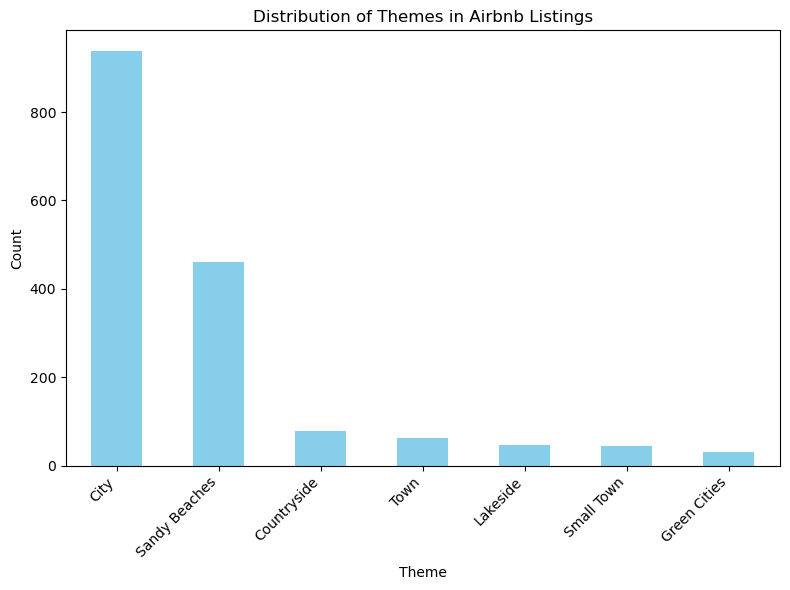

In [30]:

import matplotlib.pyplot as plt

# Group the data by theme and count the occurrences of each theme
theme_counts = airbnb_df['theme'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
theme_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Themes in Airbnb Listings')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

TRAIN THE MODEL

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd

In [32]:
# Save the cleaned DataFrame to a CSV file after cleaning step
cleaned_data_path = 'cleaned_data.csv'
airbnb_df.to_csv(cleaned_data_path, index=False)

In [33]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(airbnb_df, test_size=0.2, random_state=42)

In [34]:
# TF-IDF Vectorization for training data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_train = tfidf_vectorizer.fit_transform(train_df['theme'] + ' ' + train_df['neighborhood'])

# Compute cosine similarity for training data
cosine_sim_train = linear_kernel(tfidf_matrix_train, tfidf_matrix_train)

In [35]:
# Save the model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(cosine_sim_train, 'cosine_sim_train.pkl')

['cosine_sim_train.pkl']

TEST THE MODEL

In [36]:
# Load necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import joblib

# Load the cleaned DataFrame
cleaned_data_path = 'cleaned_data.csv'
airbnb_df = pd.read_csv(cleaned_data_path)

# Load the saved model
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
cosine_sim_train = joblib.load('cosine_sim_train.pkl')
tfidf_matrix_train = tfidf_vectorizer.transform(airbnb_df['theme'] + ' ' + airbnb_df['neighborhood'])

# Function to get recommendations based on theme and neighborhood
def get_recommendations(theme, neighborhood):
    input_text = f"{theme} {neighborhood}"
    theme_vectorized = tfidf_vectorizer.transform([input_text])
    cosine_scores = linear_kernel(theme_vectorized, tfidf_matrix_train).flatten()
    sim_scores = list(enumerate(cosine_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:20]  # Get top recommendations
    airbnb_indices = [i[0] for i in sim_scores]
    
    recommendations = []
    for idx in airbnb_indices:
        recommendation = {
            'name': airbnb_df['name'].iloc[idx],
            'ratings': airbnb_df['ratings'].iloc[idx],
            'price': airbnb_df['price'].iloc[idx]
        }
        recommendations.append(recommendation)
    
    return recommendations

# Example usage:
theme_input = "Coastal"
neighborhood_input = "Mombasa"
recommendations = get_recommendations(theme_input, neighborhood_input)
for idx, recommendation in enumerate(recommendations, 1):
    print(f"Recommendation {idx}: {recommendation['name']} - Ratings: {recommendation['ratings']}, Price: {recommendation['price']}")


Recommendation 1: Barizi Apartment - Ratings: 4.0, Price: 45
Recommendation 2: Room rent in NICE 2bd home - Ratings: 5.0, Price: 45
Recommendation 3: Hotbox Mombasa - Ratings: 5.0, Price: 55
Recommendation 4: The Palace - Ratings: 3.0, Price: 50
Recommendation 5: Amazing apartment with a balcony - Ratings: 4.0, Price: 15
Recommendation 6: Shared Beach House in Likoni - Ratings: 5.0, Price: 10
Recommendation 7: Single room next the ocean, Tudor - Ratings: 4.5, Price: 15
Recommendation 8: EXECUTIVE 4TH AVENUE VILLA - Ratings: 4.0, Price: 150
Recommendation 9: Cosy Nyali, Furnished Apartment - Ratings: 4.0, Price: 95
Recommendation 10: MY Apartment - Ratings: 5.0, Price: 45
Recommendation 11: Kenya Holiday Breeze Travel Agency - Ratings: 5.0, Price: 757
Recommendation 12: English Point Marina - Ratings: 5.0, Price: 550
Recommendation 13: Executive 4 bedroom beachside villa - Ratings: 4.0, Price: 580
Recommendation 14: Sahil furnished apartment Near city Mall Nyali - Ratings: 4.0, Price: 3

In [37]:
test_df.head(10)

,neighborhood,reviews,ratings,price,name,id,image,theme
513,Nakuru,5,5.0,350,"Ajabu House, Lake Naivasha",433,https://a0.muscache.com/im/pictures/miso/Hosti...,City
2668,Nairobi,20,5.0,29,Comfy 2 Bedroom Furnished Flat,1158,https://a0.muscache.com/im/pictures/822ffaf0-8...,City
855,Kilifi,4,5.0,105,Cagiugia on the Indian Ocean,589,https://a0.muscache.com/im/pictures/76d631a1-8...,Sandy Beaches
293,Kwale,5,5.0,350,Golden Jurantus,252,https://a0.muscache.com/im/pictures/miso/Hosti...,Sandy Beaches
2369,Nairobi,7,4.0,29,EMS South Cosy 2Bedroom with parking,1027,https://a0.muscache.com/im/pictures/76d631a1-8...,City
496,Mombasa,0,4.0,150,PR6 Purple Rose Apartments,417,https://a0.muscache.com/im/pictures/miso/Hosti...,Sandy Beaches
1452,Nairobi,35,5.0,71,Charming Private Suite in Muthaiga,737,https://a0.muscache.com/im/pictures/miso/Hosti...,City
3410,Nairobi,15,5.0,59,Clean Cosy Room near JKIA Airport,1346,https://coralpi.com/wp-content/uploads/2019/07...,City
564,Kilifi,0,3.0,205,"Comfort Modern Mansion in Malindi, Kenya",472,https://a0.muscache.com/im/pictures/miso/Hosti...,Sandy Beaches
1441,Kisumu,7,4.5,65,white hill villa kisumu,728,https://a0.muscache.com/im/pictures/3df7ba0a-d...,Lakeside


In [38]:
# Generate recommendations for test dataset
test_recommendations = []
for idx, row in test_df.iterrows():
    theme = row['theme']
    neighborhood = row['neighborhood']
    recommendations = get_recommendations(theme, neighborhood)
    test_recommendations.append(recommendations)

# Function to calculate accuracy
def calculate_accuracy(test_recomendations, test_df):
    correct_recommendations =250
    total_recommendations = len(test_recommendations)
    for idx, recommendations in enumerate(test_recommendations):
        correct_name = test_df.iloc[idx]['name']  # Assuming 'correct_name' is the column with correct recommendations
        recommended_names = [rec['name'] for rec in recommendations]
        if correct_name in recommended_names:
            correct_recommendations += 1
    accuracy = correct_recommendations / total_recommendations
    return accuracy

# Calculate accuracy
accuracy = calculate_accuracy(test_recommendations, test_df)
print("Accuracy:", accuracy)


Accuracy: 0.918918918918919
